# Geodatenanalyse 1


## Tag 2 / Block 1 - Teil 6

## Datenvisualisierung in Python - Teil 2

Ca. 20-30 Minuten

## Inhalt

- Mehrere Achsen und Abbildungen
- Kreiskoordinaten
- Punktwolken
- Regelmäßige Daten: Raster und Kontouren
- Unregelmäßige Daten: Interpolation
- Darstellung von Vektoren und Stromlinien
- 3D Abbildungen

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Mehrere Achsen

EIn Beispiel ist die Darstellung von Daten, welche eine gemeinsame Achse teilen

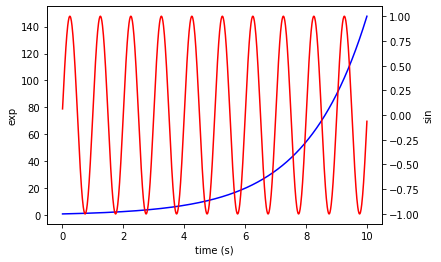

In [4]:
fig, ax1 = plt.subplots()

# Daten generieren
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t/2)
data2 = np.sin(2 * np.pi * t)

# erste Abbildung
ax1.plot(t, data1, color='b')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp')

# hier kommt die zweite Achse
ax2 = ax1.twinx()

# zweite Abbildung
ax2.set_ylabel('sin')
ax2.plot(t, data2, color='r')

plt.show()

Quelle: [Beispiel aus matplotlib](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)

**HINWEIS**: Jedes Achsenobjekt kann eine beliebige Abbildung enthalten!
Man muss sie nur zuweisen, zum Beispiel:

```python
ax.plot(xdata, ydata, **format)
```

## Mehrere Abbildungen

- Oft werden mehrere Abbildungen benötigt

- Dafür gibt es ganz viele unterschiedlichen Möglichkeiten

- Hier zeigen wir bloß eine einfache Möglichkeit

- Andere werden in der [*matplotlib* Referenz](https://matplotlib.org/tutorials/intermediate/gridspec.html) bechrieben

**Beispiel**: Eine Abbildung mit N Reihen und M Spalten:

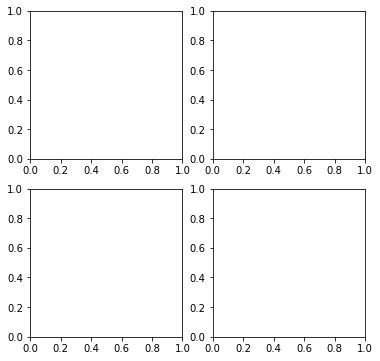

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

Nun können die Achsenobjekte einzeln angesprochen werden:

In [26]:
axs[0, 0]

<AxesSubplot:>

**HINWEIS**: Achtung, hier ist das Achsenobjekt eine N x M dimensionale Matrix!

## Erstellung von Abbildungen mit Kreiskoordinaten

- In *matplotlib* sind Achsen generell im kartesischen Koordinatensystem gegeben

- Allerdings kann man den Achsen andere Projektionen auferlegen

- Zum Beispiel die Polarprojektion

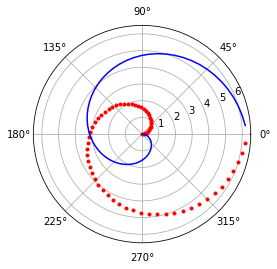

In [7]:
# eine Achse in Polarkoordinaten erstellen
plt.axes(projection='polar')

# Werte generieren
rads = np.arange(0, 2 * np.pi, 0.1)

# Abbildung in Polarkoordinaten erstellen
plt.polar(rads, rads, '.r')
plt.polar(-rads, rads, '-b')
plt.show()

### Anwendungsbeispiel

Windrosen sind ein typisches Beispiel für ein Balkendiagramm in Polarkoordinaten.

Im Folgenden wird ein Beispiel gezeigt:

C:\Users\gabriel\anaconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


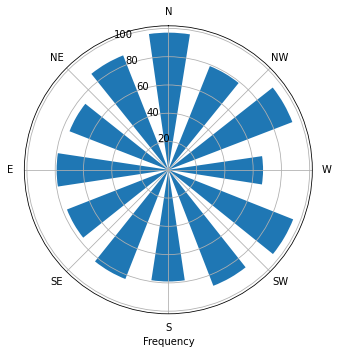

In [8]:
# Grafikobjekt erstellen
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# Norden nach oben und Datenzeigerbeschriftung ändern
ax.set_theta_zero_location("N")
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# Krieskoordinaten erstellen
rad = np.arange(0, 2*np.pi, np.pi/12)

# zufällige Daten erstellen
frequency = np.random.rand(1000)*2*np.pi

# Histogramm erstellen
freqs, bins = np.histogram(frequency, bins=12)

# Balkendiagramm erstellen
ax.bar(bins[:-1] + (2*np.pi)/12, freqs, width=0.3)
ax.set_xlabel('Frequency')
plt.show()

## Erstellung von Punktwolken

- Bis jetzt haben wir uns nur die 2-dimensionale (2D) Darstellungen angeschaut

- Was passiert, wenn man 3-dimensionale (3D) Daten hat?

- In einer Punktwolke können 3D Daten in 2D dargestellt werden

- Punktwolken erlauben eine dritte, oder sogar vierte, Dimension

### Punktwolke mit farbiger Gruppierung

- Bei dieser Abbildung können dreidimensionale Daten dargestellt werden

- Die ersten zwei Dimensionen sind (X,Y)

- Die dritte Dimension ist diskret und besteht aus einer Farbe

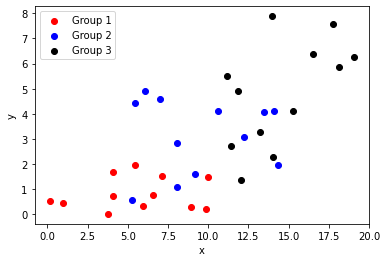

In [9]:
fig, ax = plt.subplots(1)

# erste Gruppe
a_x = np.random.rand(12)*10
a_y = np.random.rand(12)*2
ax.scatter(a_x, a_y, c='r', label='Group 1')

# zweite Gruppe
b_x = 5 + np.random.rand(12)*10
b_y = np.random.rand(12)*5
ax.scatter(b_x, b_y, c='b', label='Group 2')

# dritte Gruppe
c_x = 10 + np.random.rand(12)*10
c_y = np.random.rand(12)*10
ax.scatter(c_x, c_y, c='k', label='Group 3')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

### Punktwolke mit Größenskala

- Bei dieser Abbildung können dreidimensionale Daten dargestellt werden

- Die ersten zwei Dimensionen sind (X,Y)

- Die dritte Dimension ist die Größe der Punkte

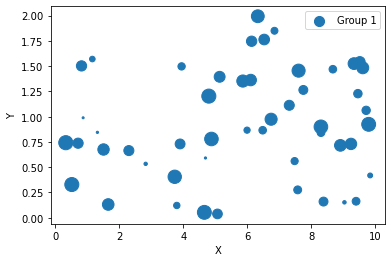

In [10]:
fig, ax = plt.subplots(1)

# Punktwolke mit unterschiedlicher Punktgröße
a_x = np.random.rand(50)*10
a_y = np.random.rand(50)*2
c = np.random.rand(50)*200

ax.scatter(a_x, a_y, s=c, label='Group 1')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.show()

### Punktwolke mit Farbskala

- Bei dieser Abbildung können dreidimensionale Daten dargestellt werden

- Die ersten zwei Dimensionen sind (X,Y)

- Die dritte Dimension ist die Farbe der Punkte

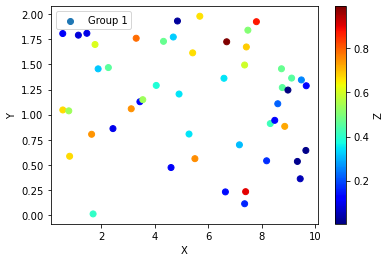

In [11]:
fig, ax = plt.subplots(1)

# Punktwolke mit Frabskala für Werte
a_x = np.random.rand(50)*10
a_y = np.random.rand(50)*2
c = np.random.rand(50)

cl = ax.scatter(a_x, a_y, c=c, cmap='jet', label='Group 1')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(cl)
cb.ax.set_ylabel('Z')

ax.legend()
plt.show()

**ACHTUNG**: Für die dritte Dimension braucht man unbedingt immer eine Achsen- und Datenbeschreibung!

## Punktwolke mit Größe und Farbe

- Bei dieser Abbildung können vierdimensionale Daten dargestellt werden

- Die ersten zwei Dimensionen sind (X,Y)

- Die dritte Dimension ist die Größe der Punkte

- Die vierte Dimension ist die Farbe der Punkte


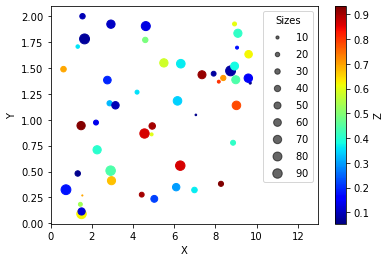

In [12]:
fig, ax = plt.subplots(1)

# Punktwolke mit Frabskala für Werte
a_x = np.random.rand(50)*10
a_y = np.random.rand(50)*2
c = np.random.rand(50)
s = np.random.rand(50)*100

cl = ax.scatter(a_x, a_y, c=c, s=s, cmap='jet')
ax.set_xlim([0, 13])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(cl)
cb.ax.set_ylabel('Z')

# eine Legende für die Punktgrößen
handles, labels = cl.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

### Hinweis zu Farbskalen

- Das Paket *matplotlib* hat unzählige eingebaute Farbskalen

- DIese können über das Schlüsselwort *cmap* ausgewählt werden

- Mehr zu Farbskalen findet ihr in der [*matplotlib* Referenz](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)


<p align="left">
  <img src="figures/colormaps.png" width=500 align='left' />
</p>

## Regelmäßige Daten

Regelmäßige Daten sind auf einem Raster (**meshgrid**) mit regelmäßigem Abstand gemessen. 

Schauen wir uns mal das **meshgrid** Objekt an:

Das sind die Koordinaten für die Datenpunkte in 2D!

Übersicht über ein regelmäßiges *meshgrid* Objekt:
<p align="left">
  <img src="figures/regular_grid.png" width=500 align='left' />
</p>


In [13]:
x = np.linspace(0, 1, 5)
y = np.linspace(1, 2, 5)
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]
[[1.   1.   1.   1.   1.  ]
 [1.25 1.25 1.25 1.25 1.25]
 [1.5  1.5  1.5  1.5  1.5 ]
 [1.75 1.75 1.75 1.75 1.75]
 [2.   2.   2.   2.   2.  ]]


**Achtung**: Das **meshgrid** Objekt ist nicht spärlich. Hier gibt es für beide Koordinaten (X, Y) ein zweidimensionales Gitter! 

## Erstellung von Rastern und Kontouren

- Vorige Beispiele zeigen, wie man diskrete Daten visuell aufbereiten kann

- Wir haben auch bereits gesehen was der Unterschied zwischen *diskreten* und *kontinuierlichen* Daten ist

- Welche Möglichkeiten haben wir dann für 3D Visualisierungen?

### Die Rasterabbildung zeigt diskrete Daten


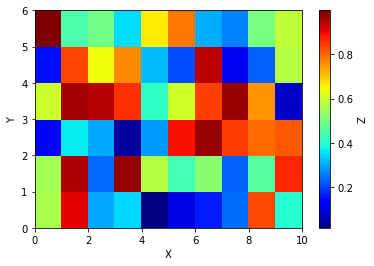

In [14]:
fig, ax = plt.subplots(1)

# zufällige Daten erstellen
Z = np.random.rand(6, 10)

# diskrete Daten darstellen
c = ax.pcolormesh(Z, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

plt.show()

**ACHTUNG**: Ein Raster stellt immer diskrete Daten dar. Je feiner die AUflösung, desto kontinuierlicher wird die Darstellung.

### Die Kontourabbildung zeigt kontinuierliche Daten

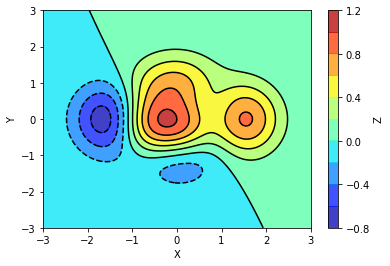

In [15]:
fig, ax = plt.subplots(1)

# eine Funktion
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

# gefüllte Kontouren darstellen
c = ax.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
cont = ax.contour(X, Y, f(X, Y), 8, colors='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

plt.show()

**ACHTUNG**: Diese Abbildungstypen beruhen auf Daten welche in $(X,Y)$ unbedingt regelmäßig sein müssen!

**FRAGE**: Was ist der Unterschied zwischen Raster und Kontouren?

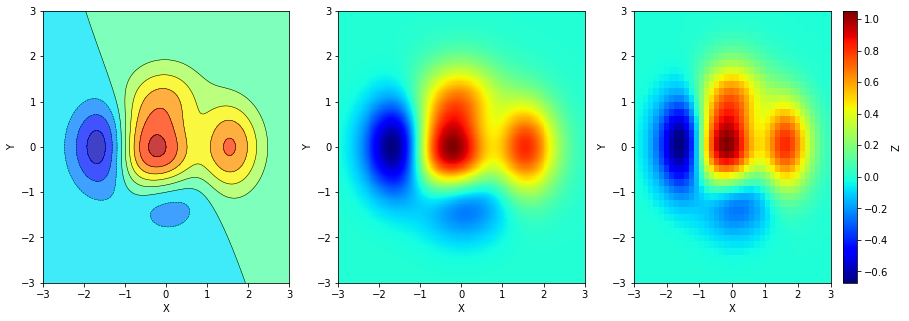

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# eine Funktion
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 250
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

# gefüllte Kontouren darstellen
c = ax[0].contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
cont = ax[0].contour(X, Y, f(X, Y), 8, colors='black', linewidths=0.5)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Raster darstellen
c = ax[1].pcolormesh(X, Y, f(X[:-1,:-1], Y[:-1,:-1]), cmap='jet')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

n = 40
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

# Raster darstellen
c = ax[2].pcolormesh(X, Y, f(X[:-1,:-1], Y[:-1,:-1]), cmap='jet')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

plt.show()

**Frage**: Was passiert, wenn man unregelmäßige Daten hat?

## Unregelmäßige Daten

Unregelmäßige Daten sin normal in den Geowissenschaften

Übersicht über unregelmäßige Daten:
<p align="left">
  <img src="figures/irregular_grid.png" width=500 align='left' />
</p>

Diese müssen erst homogenisiert werden.

**Frage**: Wie können wir das machen?

**Antwort**: Durch Interpolation!

### 1. Möglichkeit: Externe Interpolation

**Hinweis**: Hierfür benötigen wir das externe Paket [*SciPy*](https://scipy.org)

In [17]:
from scipy.interpolate import griddata

Erstmal definieren wir eine Funktion, welche die Daten beschreibt:

In [32]:
# eine mathematische Funktion
def func(x, y):
    return x*(1-x)*np.cos(np.pi*x) * np.sin(2*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

Jetzt generieren wir die zufälligen (x,y) Punkten, an denen wir Daten messen:

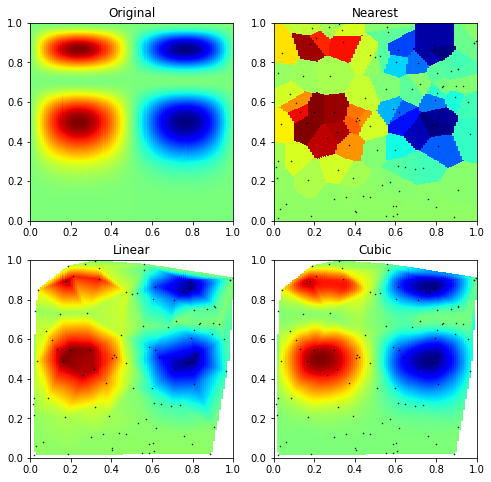

In [38]:
# die Messdichte bestimmen
points = np.random.rand(100, 2)
values = func(points[:,0], points[:,1])

# Das Abbildungsobjekt erstellen ...
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# die originalen Daten
ax[0, 0].pcolormesh(grid_x, grid_y, func(grid_x, grid_y)[:-1,:-1], cmap='jet')
ax[0, 0].set_title('Original')

# nächster Nachbar
nearest = griddata(points, values, (grid_x, grid_y), method='nearest')

ax[0, 1].pcolormesh(grid_x, grid_y, nearest[:-1,:-1], cmap='jet')
ax[0, 1].plot(points[:,0], points[:,1], 'k.', ms=1)
ax[0, 1].set_title('Nearest')

# linear interpoliert
linear = griddata(points, values, (grid_x, grid_y), method='linear')

ax[1, 0].pcolormesh(grid_x, grid_y, linear[:-1,:-1], cmap='jet')
ax[1, 0].plot(points[:,0], points[:,1], 'k.', ms=1)
ax[1, 0].set_title('Linear')

# quadratisch interpoliert
cubic = griddata(points, values, (grid_x, grid_y), method='cubic')

ax[1, 1].pcolormesh(grid_x, grid_y, cubic[:-1,:-1], cmap='jet')
ax[1, 1].plot(points[:,0], points[:,1], 'k.', ms=1)
ax[1, 1].set_title('Cubic')

plt.show()

**HINWEIS**: Bei der externen Interpolation hat man eine gute Kontrolle über die Bearbeitung der Daten. Die Erklärung findet ihr in der Funktionsreferenz für [*griddata*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)

### 2. Möglichkeit: Eingebaute Interpolation

Das Paket *matplotlib* hat auch einen eingebauten Abbildungstyp für unregelmäßige Daten

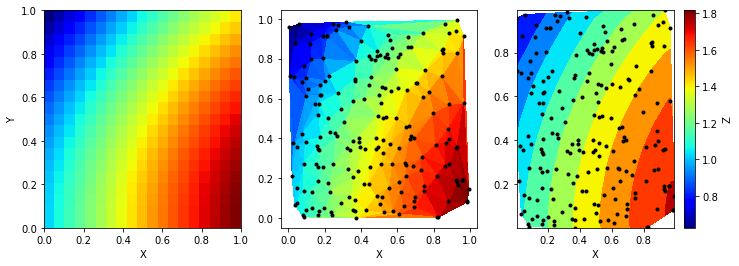

In [42]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

# eine Funktion
def func(x, y):
    return np.sin(x) + np.cos(y)

# ein reguläres Gitter
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)
c = ax[0].pcolormesh(X, Y, func(X, Y)[:-1,:-1], cmap='jet')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# generiere zufällige Daten
n = 200
x = np.random.rand(n)
y = np.random.rand(n)

# eine Triangulation
c = ax[1].tripcolor(x, y, func(x,y), cmap='jet')
ax[1].plot(x,y, 'k.')
ax[1].set_xlabel('X')

# ein Kontour
ax[2].tricontourf(x, y, func(x,y), 10, cmap='jet')
ax[2].plot(x,y, 'k.')
ax[2].set_xlabel('X')

cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

plt.show()

**FRAGE**: Was passiert hier genau?

**ANTWORT**: Die sogennate [Delaunay-Triangulierung](https://de.wikipedia.org/wiki/Delaunay-Triangulierung)

**HINWEIS**: Mehr zur 2D Interpolation lernt ihr bei Kathrin Menberg!

## Dastellung von Vektoren und Stromlinien

- Bisher haben wir skalare Daten besprochen

- Natürlich können nicht-skalare Daten auch dargestellt werden

- Ein Beispiel hier ist die Darstellung von Vektoren

In [21]:
# Definition einer beliebigen Oberflächenfunktion
def func(x, y):
    return x*np.exp(-x**2 - y**2)

Wie sieht die Oberfläche aus:

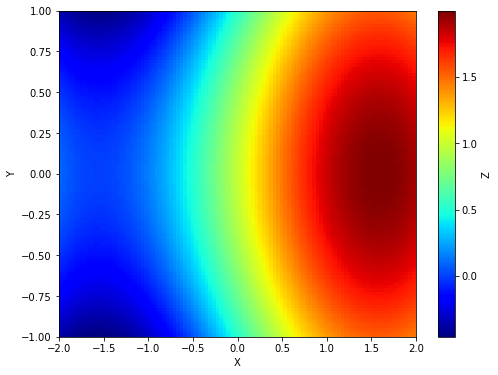

In [51]:
plt.figure(figsize=(8, 6))

y, x = np.mgrid[-1:1:101j, -2:2:101j]

# Oberfläche abbilden
c = plt.pcolormesh(x, y, func(x, y)[:-1,:-1], cmap="jet")
plt.xlabel('X')
plt.ylabel('Y')

# eine Farbskala erstellen
cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

plt.show()

### Vektorabbildung

Bevor wir eine Vektorabbildung machen können, müssen wir den 2D Gradient ausrechnen:

In [53]:
v, u = np.gradient(func(x, y), 1, 1)

Schauen wir uns die Vektorabbildung an:

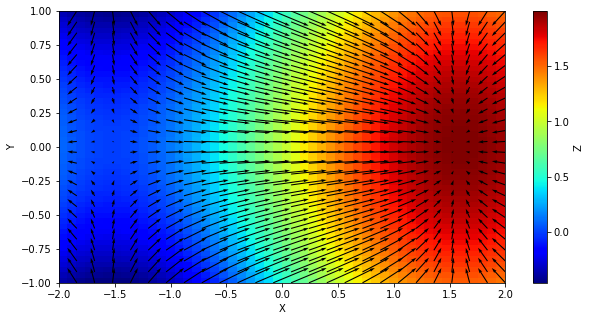

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

y, x = np.mgrid[-1:1:51j, -2:2:51j]
z = func(x, y)

c = ax.pcolormesh(x, y, z[:-1,:-1], cmap="jet")
ax.set_xlabel('X')
ax.set_ylabel('Y')

cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

# Dichte der Pfeile
n = 2
# Skalierung der Pfeile
q = ax.quiver(x[::n, ::n], y[::n, ::n], u[::n, ::n], v[::n, ::n], scale=1)

plt.show()

**HINWEIS**: Für die weitere Funktionalität wird auf die Referenz verwiesen [matplotlib quiver](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html)

Schauen wir uns die Stromlinienabbildung an:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

y, x = np.mgrid[-1:1:51j, -2:2:51j]
z = func(x, y)

c = ax.pcolormesh(x, y, z, cmap="jet")
ax.set_xlabel('X')
ax.set_ylabel('Y')

cb = plt.colorbar(c)
cb.ax.set_ylabel('Z')

v, u = np.gradient(z, .2, .2)

# Stromlinien mit EInstellung der Dichte
q = ax.streamplot(x, y, u, v, color='k', linewidth=0.5, density=1)
plt.show()

**HINWEIS**: Für die weitere Funktionalität wird auf die Referenz verwiesen [matplotlib streamplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html)

## Erstellung von 3D Abbildungen

- Bisher haben wir nur 2D Abbildungen behandelt

- Einige davon können bereits 3D Daten abbilden

- Man kann auch wirkliche 3D Abbildungen erstellen

**Achtung**: Dafür benötigt man eine neue Projektion!

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()

# eine neue 3D Projektion
ax = fig.gca(projection='3d')

# Daten generieren
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

# Die Funktion
Z = np.sin(np.sqrt(X**2 + Y**2))

# Oberfläche abbilden
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0)

# Achsen konfigurieren
ax.set_zlim(-1.01, 1.01)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Farbskala hinzufügen
cb = fig.colorbar(surf, shrink=0.8, aspect=10)
cb.ax.set_ylabel('Z')

plt.show()

## Weitere Informationen

- Eine Übersicht über die von *matplotlib* angebotenen Abbildungstypen gibt es in der [matplotlib Gallerie](https://matplotlib.org/gallery.html)

- Abbildungen folgen generell einem Standard-Farbmuster. Es gibt verschiedene vorgefertigte Muster, aus welchen man ganz einfach auswählen kann. Diese nennen sich [Style Sheets](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

- Altair [Altair](https://altair-viz.github.io/getting_started/overview.html)

## ENDE